In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [14]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\final\\cleaned_data_1.csv")

features = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight']

X = data[features]

X = X.apply(pd.to_numeric, errors='coerce')

X = X.dropna()

In [15]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Build and fitting the LOF model
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)
y_pred = lof.fit_predict(X_scaled)

In [23]:
# from sklearn.metrics import silhouette_score
# # Calculate the Silhouette Score
# silhouette_avg = silhouette_score(X_scaled, y_pred)

# print(f"Silhouette Score: {silhouette_avg:.2f}")

# # LOF
# import time
# start_time = time.time()
# lof = LocalOutlierFactor(n_neighbors=100, contamination=0.05)
# lof.fit(X_scaled)
# lof_time = time.time() - start_time
# print(f"LOF Time: {lof_time:.4f} seconds")

In [25]:
true_labels = np.where(y_pred == -1, 1, 0) 
predicted_labels = np.where(y_pred == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score, and Accuracy
precision = precision_score(true_labels, predicted_labels, zero_division=1)
recall = recall_score(true_labels, predicted_labels, zero_division=1)
f1 = f1_score(true_labels, predicted_labels, zero_division=1)
# accuracy = accuracy_score(true_labels, predicted_labels)



print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# print(f"Accuracy: {accuracy:.2f}")



Confusion Matrix:
[[4271    0]
 [   0  225]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [19]:
outlier_indices = np.where(y_pred == -1)[0]
print("Indices of outliers:", outlier_indices)

outliers = data.iloc[outlier_indices]
print("Details of outliers:")
print(outliers)

Indices of outliers: [   5   19   22   25   40   48   51   56   72   73   80   81   83   84
   85   87  100  108  109  128  129  133  134  145  149  151  155  159
  160  161  162  174  176  177  181  183  196  210  211  213  219  220
  230  243  246  260  273  284  353  403  408  413  430  451  453  463
  546  548  564  590  642  643  648  650  679  717  735  741  774  794
  801  819  849  863  869  903  971  972  982  994 1015 1017 1026 1029
 1030 1032 1035 1072 1075 1090 1145 1157 1178 1183 1196 1197 1198 1219
 1227 1236 1257 1258 1300 1332 1348 1369 1370 1379 1387 1390 1392 1411
 1468 1500 1508 1512 1524 1528 1559 1562 1566 1568 1624 1626 1642 1707
 1712 1733 1766 1813 1856 1904 1914 1935 1958 1965 1998 2006 2015 2059
 2095 2182 2196 2215 2346 2379 2399 2440 2475 2526 2533 2552 2561 2580
 2589 2616 2625 2650 2671 2672 2704 2705 2706 2713 2724 2726 2732 2766
 2825 2827 2833 2852 2869 2905 2966 2978 2989 3006 3012 3024 3026 3029
 3065 3079 3107 3253 3287 3300 3322 3374 3384 3414 3461 

In [20]:
# # Analyzing results
# print(pd.value_counts(y_pred))
# print(X_scaled.loc[y_pred == -1, :])

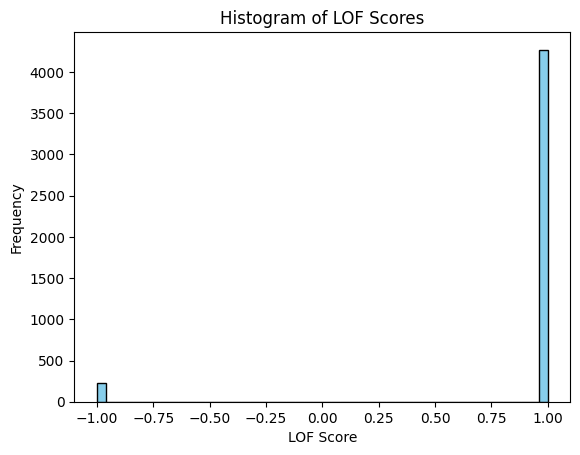

In [21]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Histogram of LOF Scores')
plt.show()

In [22]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# # Read the data
# data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\final\\cleaned_data_1.csv")

# # Select features
# features = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight']

# # Extract feature values and handle missing values
# X = data[features].apply(pd.to_numeric, errors='coerce').dropna()

# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Build and fit the LOF model
# lof = LocalOutlierFactor(n_neighbors=100, contamination=0.05)
# y_pred = lof.fit_predict(X_scaled)

# # # Calculate Mean Squared Error for LOF scores
# # mse = mean_squared_error(np.ones_like(y_pred), -lof.negative_outlier_factor_)  # assuming inliers are labeled as 1
# # print(f'Mean Squared Error of LOF Scores: {mse*100:.4f}')

# from sklearn.metrics import mean_squared_error

# # Calculate the negative LOF scores (anomaly scores)
# lof_scores = -lof.negative_outlier_factor_

# # Calculate Mean Squared Error
# mse = mean_squared_error(true_labels, lof_scores)

# print(f"Mean Squared Error: {mse:.2f}")


